In [7]:
import lmfit
from lmfit import Parameters

In [8]:
pars = Parameters()
pars.add('x', value = 5, vary=True)
pars.add('y', expr='delta-x', vary==True)
pars.add('z', value = 5, , vary=True)

In [10]:
pars.pretty_print()


Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
delta         5     -inf       10     None     True     None     None
x             5     -inf      inf     None     True     None     None
y             0     -inf      inf     None    False  delta-x     None


In [11]:
pars.__dict__

{'_asteval': <lmfit.asteval.Interpreter at 0x11a993128>}

In [12]:
import pprint

In [13]:
pprint.pprint(pars.__dict__)

{'_asteval': <lmfit.asteval.Interpreter object at 0x11a993128>}


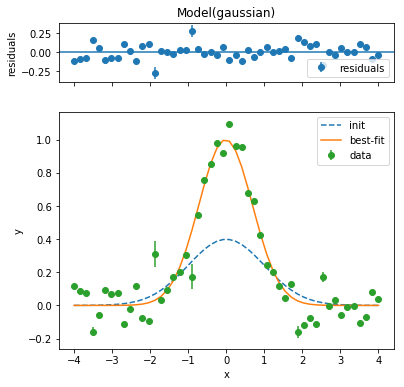

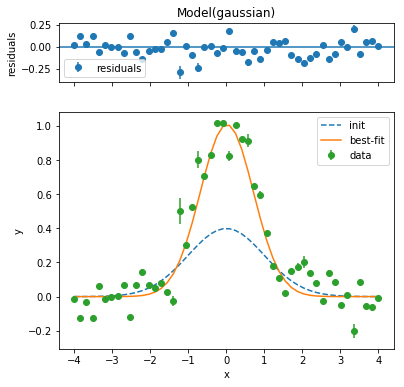

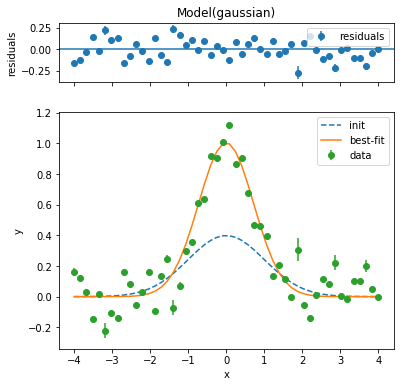

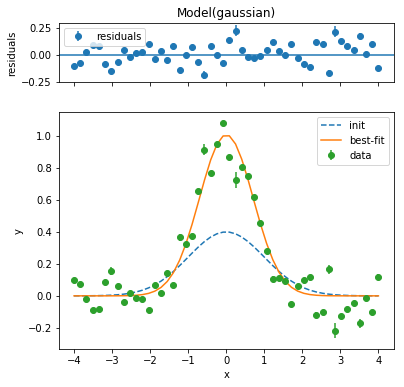

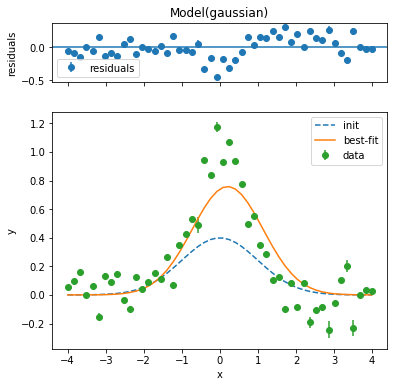

In [5]:
import lmfit
import numpy as np
from matplotlib import pyplot as plt

# construct data
x = np.linspace(-4, 4)
y = np.exp(-x**2)

noise = np.random.randn(x.size) * 0.1
y += noise

# define model and fit
model = lmfit.models.GaussianModel()
model.guess(y, x=x)
fit = model.fit(y, x=x, weights=1/noise**2)

fig = fit.plot()

# customize plot post-factum
# ax_residuals, ax_fit = fig.get_axis()
# ax_residuals.set_title('The residuals')
# ax_fit.set_title('An example gaussian fit')
# ax_residuals.get_legend().set_visible(False)
# ax_fit.get_legend().texts[0].set_size('small')

plt.show()

$\rho_{Gd}$

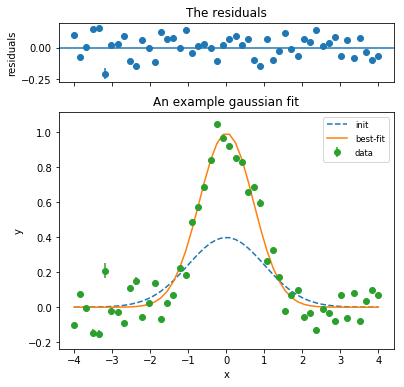

In [1]:
import lmfit
import numpy as np
from matplotlib import pyplot as plt

# construct data
x = np.linspace(-4, 4)
y = np.exp(-x**2)

noise = np.random.randn(x.size) * 0.1
y += noise

# define model and fit
model = lmfit.models.GaussianModel()
model.guess(y, x=x)
fit = model.fit(y, x=x, weights=1/noise**2)

fig, gridspec = fit.plot()

# customize plot post-factum
ax_residuals, ax_fit = fig.get_axes()
ax_residuals.set_title('The residuals')
ax_fit.set_title('An example gaussian fit')
ax_residuals.get_legend().set_visible(False)
ax_fit.get_legend().texts[0].set_size('small')

plt.show()

 ITER  1 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  2 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  3 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  4 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  5 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  6 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  7 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  8 ['2.00000', '6.00000', '3.00000', '0.00000', '0.00000', '4.70964', '0.59841']
 ITER  9 ['6.65379', '24.58101', '27.07941', '3.27582', '-0.20720', '15.66848', '1.62360']
 ITER  10 ['6.65379', '24.58101', '27.07941', '3.27582', '-0.20720', '15.66848', '1.62360']
 ITER  11 ['6.65379', '24.58101', '27.07941', '3.27582', '-0.20720', '15.66848', '1.62360']
 ITER  12 ['6.65379', '24.581

 ITER  93 ['1.22112', '7.65142', '24.37229', '3.34072', '-0.20020', '2.87552', '7.96248']
 ITER  94 ['1.22112', '7.65142', '24.37229', '3.34072', '-0.20020', '2.87552', '7.96248']
 ITER  95 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  96 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  97 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  98 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  99 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  100 ['1.22227', '7.65122', '24.39823', '3.33849', '-0.20011', '2.87824', '7.96342']
 ITER  101 ['1.22228', '7.65121', '24.39826', '3.33849', '-0.20011', '2.87824', '7.96342']
 Nfev =  101
[[Model]]
    (Model(gaussian, prefix='peak_') + Model(linear, prefix='bkg_'))
[[Fit Statistics]]
    # function evals   = 101
    # data points      = 401
    # variables    

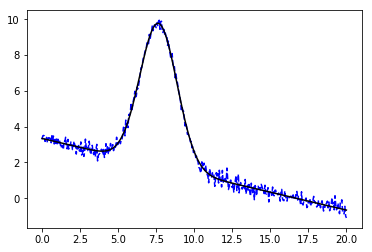

In [2]:
from numpy import linspace, random
import matplotlib.pylab as pylab

from lmfit.models import LinearModel, GaussianModel
from lmfit.lineshapes import gaussian

def per_iteration(pars, iter, resid, *args, **kws):
    print(" ITER ", iter, ["%.5f" % p for p in pars.values()])


x = linspace(0., 20, 401)
y = gaussian(x, amplitude=24.56, center=7.6543, sigma=1.23)
y = y  - .20*x + 3.333 + random.normal(scale=0.23,  size=len(x))

mod = GaussianModel(prefix='peak_') + LinearModel(prefix='bkg_')

pars = mod.make_params()
pars['peak_amplitude'].value = 3.0
pars['peak_center'].value = 6.0
pars['peak_sigma'].value = 2.0
pars['bkg_intercept'].value = 0.0
pars['bkg_slope'].value = 0.0


out = mod.fit(y, pars, x=x, iter_cb=per_iteration)

pylab.plot(x, y, 'b--')

print(' Nfev = ', out.nfev)
print( out.fit_report())

pylab.plot(x, out.best_fit, 'k-')
pylab.show()